<a href="https://colab.research.google.com/github/juanserrano90/codelatam/blob/main/DataPreparation/prepare_paper_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [296]:
import sys
from os.path import isfile
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats
import random
import logging
from add_spikes import add_spikes
from shift_spectrum import shift_spectrum
from get_redshift import get_redshift
import os

In [297]:
np.random.seed(3312)

In [298]:
url = "https://github.com/juanserrano90/codelatam/raw/main/Data/data/sn_data.parquet"
df_raw = pd.read_parquet(url, engine="pyarrow")
wavelength = np.array([float(c) for c in df_raw.columns[5:]])
column_names = df_raw.columns.values.tolist()
column_names = np.array(column_names[5:]).astype(float)

In [299]:
df_raw.describe()

,SN Subtype ID,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,2515.28,2518.69,2522.1,...,9872.21,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24
count,5001.000000,5001.000000,5001.000000,5001.0,5001.0,5.001000e+03,5001.000000,5001.000000,5001.000000,5001.000000,...,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000,5001.000000,5001.0,5001.0
mean,3.993201,0.655069,36.539334,0.0,0.0,7.998400e-07,0.000005,0.000010,0.000007,0.000019,...,0.000008,0.000093,0.000039,0.000055,0.000027,0.000024,0.00001,0.000005,0.0,0.0
std,5.162127,1.024109,88.017382,0.0,0.0,2.827296e-05,0.000130,0.000244,0.000330,0.000641,...,0.005317,0.004881,0.003690,0.002672,0.001601,0.001002,0.00043,0.000113,0.0,0.0
min,0.000000,0.000000,-82.700000,0.0,0.0,0.000000e+00,-0.002000,-0.003000,-0.008000,-0.005000,...,-0.059000,-0.038000,-0.059000,-0.021000,-0.012000,-0.008000,-0.00300,-0.001000,0.0,0.0
25%,0.000000,0.000000,-0.200000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0
50%,1.000000,0.000000,11.900000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0
75%,8.000000,1.000000,36.100000,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0
max,16.000000,3.000000,1103.000000,0.0,0.0,1.000000e-03,0.004000,0.009000,0.015000,0.025000,...,0.107000,0.153000,0.071000,0.052000,0.036000,0.022000,0.00900,0.002000,0.0,0.0


In [300]:

index = 417
spectrum = df_raw.iloc[index][5:]
sn_name = df_raw.index[index].lower()
redshift = get_redshift(sn_name)
df_raw.iloc[index][:5]

Columnas en el archivo CSV: ['SN_Name', 'old_name', 'redshift', 'year']
Available SN names or old names: ['sn2008ar', 'sn1999ac', 'sn1998dk', 'sn2005gj', 'sn2004eo', 'sn2002cr', 'sn2006ej', 'sn2003ai', 'sn2001br', 'sn2006et']


SN Subtype        Ia-91T
SN Subtype ID          1
SN Maintype           Ia
SN Maintype ID         0
Spectral Phase      15.5
Name: sn2003fa, dtype: object

In [301]:
redshifted_spectrum = shift_spectrum(np.array(spectrum), redshift)
spiked_spectrum = add_spikes(np.array(spectrum), redshift)
redshifted_and_spiked_spectrum = shift_spectrum(np.array(spiked_spectrum), redshift)

Central wavelength: 6250.781896383187 Å
Redshift variation: 0.006031512635014549
Wavelength shift: 37.7016699867554 Å
Pixel shift: 5
Central wavelength: 6250.781896383187 Å
Redshift variation: 0.005886961091466803
Wavelength shift: 36.7981098152529 Å
Pixel shift: 5


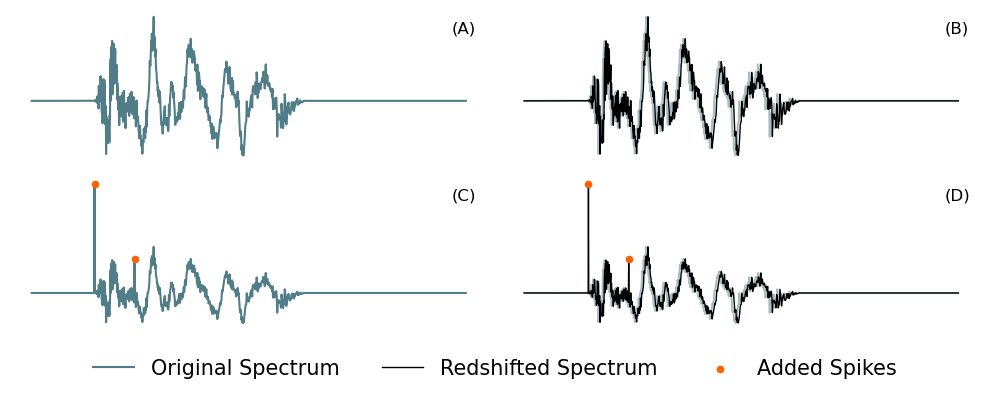

In [302]:
# Create figure
lw = 1.5
colors = ['black', '#507d87', '#FFFFFF', '#FE6100']

fig, ax = plt.subplots(2, 2, figsize=(10, 3.5))

ax[0,0].plot(wavelength, spectrum, c=colors[1], linewidth=lw, label='Original Spectrum')
ax[0,1].plot(wavelength, spectrum, c=colors[1], linewidth=lw, alpha=0.5)
ax[0,1].plot(wavelength, redshifted_spectrum, c=colors[0], linewidth=lw-0.5,
             label='Redshifted Spectrum')
ax[1,0].plot(wavelength, spiked_spectrum, c=colors[1], linewidth=lw)
mask = (spiked_spectrum - spectrum) > 0.5
ax[1,0].scatter(wavelength[mask], spiked_spectrum[mask], color=colors[3], s=20, label='Added Spikes', zorder=3)
ax[1,1].plot(wavelength, spectrum, c=colors[1], linewidth=lw, alpha=0.5)
ax[1,1].plot(wavelength, redshifted_and_spiked_spectrum, c=colors[0], linewidth=lw-0.5)
mask = (redshifted_and_spiked_spectrum - redshifted_spectrum) > 0.5
ax[1,1].scatter(wavelength[mask], redshifted_and_spiked_spectrum[mask], color=colors[3], s=20, zorder=3)

# Remove ticks and color spines
for row in ax:
    for a in row:
        a.set_xticks([])
        a.set_yticks([])
        for spine in a.spines.values():
            spine.set_color(colors[2])

# Add panel labels
labels = ['(A)', '(B)', '(C)', '(D)']
for i, a in enumerate(ax.flat):
    a.text(0.925, 0.925, labels[i], transform=a.transAxes,
           ha='left', va='top', fontsize=12)

# Collect handles and labels across all axes
handles, labels = [], []
for a in ax.flat:
    h, l = a.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

# Deduplicate by label
unique = dict(zip(labels, handles))

# Global legend at the bottom
fig.legend(unique.values(), unique.keys(),
           loc="lower center", ncol=4, frameon=False,
           bbox_to_anchor=(0.5, -0.15), fontsize=15)

plt.tight_layout()
plt.show()


---
First plot ready. Now plotting inmbalancing figures.

---

In [303]:
df = df_raw.drop(df_raw.loc[df_raw['3301.9'] == 2071.001].index)

In [310]:
df.head()

,SN Subtype,SN Subtype ID,SN Maintype,SN Maintype ID,Spectral Phase,2501.69,2505.08,2508.48,2511.87,2515.28,...,9885.59,9898.98,9912.39,9925.82,9939.27,9952.73,9966.21,9979.71,9993.24,Category
SN Name,,,,,,,,,,,,,,,,,,,,,
sn2008ar,Ia-norm,0,Ia,0,-8.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
sn2008ar,Ia-norm,0,Ia,0,-7.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
sn2008ar,Ia-norm,0,Ia,0,-6.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
sn2008ar,Ia-norm,0,Ia,0,-4.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
sn2008ar,Ia-norm,0,Ia,0,-3.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [275]:
print(df_raw.iloc[:,6:].max().max())
print(df_raw.iloc[:,6:].max().idxmax())
print(df.iloc[:,6:].max().max())
print(df.iloc[:,6:].max().idxmax())
print(df_raw.iloc[:,6:].min().min())
print(df_raw.iloc[:,6:].min().idxmin())
print(df.iloc[:,6:].min().min())
print(df.iloc[:,6:].min().idxmin())
df_raw_max = df_raw.iloc[:,6:].max().max()
df_raw_min = df_raw.iloc[:,6:].min().min()
df_max = df.iloc[:,6:].max().max()
df_min = df.iloc[:,6:].min().min()
ratio = (df_raw_max-df_raw_min)/(df_max-df_min)
print(ratio)

2071.001
3301.9
56.627
4190.28
-2026.006
3310.85
-17.943
3306.37
54.94175942067856


In [279]:
unique_sn = df.index.value_counts()
unique_sn

SN Name
sn1987A       241
sn1993J        73
sn2005cf       67
sn2003du       60
sn1998S        57
             ... 
sn06cs          1
sn99gd          1
sn2009nz        1
snls03D3bb      1
iPTF13bvn       0
Name: count, Length: 518, dtype: int64

In [280]:
def maping(a):
  subtype_to_category = {0:0, 1:1, 3:1, 2:1, 6:2, 4:1, 5:1, 10:2, 13:2, 14:2, 8:2, 16:2, 11:2, 12:2, 15:2, 7:2, 9:2}
  return subtype_to_category[a]

In [306]:
subtypes = df.iloc[:, 1].to_numpy()
category = [maping(sn) for sn in subtypes]
df['Category'] = category

In [315]:
spectra_counts = df.groupby(['Category', 'SN Subtype']).size()
spectra_counts = spectra_counts[spectra_counts != 0]
print(sn_counts)

Category  SN Subtype
0         Ia-norm       2387
1         Ia-91T         398
          Ia-91bg        264
          Ia-csm          30
          Ia-pec         141
          Iax             68
2         II-pec         241
          IIL             13
          IIP            176
          IIb            328
          IIn             64
          Ib-norm        254
          Ib-pec          15
          Ibn             31
          Ic-broad       279
          Ic-norm        263
          Ic-pec          33
dtype: int64


/tmp/ipykernel_13738/992280299.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sn_counts = df.groupby(['Category', 'SN Subtype']).size()


In [319]:
sn_counts = df.groupby(['Category', 'SN Subtype']).apply(lambda g: g.index.nunique())
print(sn_counts)


Category  SN Subtype
0         Ia-norm       319
1         Ia-91T         36
          Ia-91bg        42
          Ia-csm          3
          Ia-pec          7
          Iax             7
2         II-pec          1
          IIL             2
          IIP             6
          IIb            19
          IIn             2
          Ib-norm        21
          Ib-pec          2
          Ibn             3
          Ic-broad       24
          Ic-norm        21
          Ic-pec          2
dtype: int64


/tmp/ipykernel_13738/1444860500.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sn_counts = df.groupby(['Category', 'SN Subtype']).apply(lambda g: g.index.nunique())
/tmp/ipykernel_13738/1444860500.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sn_counts = df.groupby(['Category', 'SN Subtype']).apply(lambda g: g.index.nunique())


In [ ]:
np.load()
